In [10]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

df = pd.read_pickle('corpus.pkl')
df

,transcript,full_name
hasan,Hasan Minhaj’s full comedy routine at the 2017...,Hasan Minhaj
russell,"-Yeah, Russell! Oi, Russell! Your mother is so...",Russell Peters
trevor,A NETFLIX ORIGINAL COMEDY SPECIAL [distant tra...,Trevor Noah


In [11]:
# Create quick lambda functions to find the polarity and subjectivity of each routine

#!pip install TextBlob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['transcript'].apply(pol)
df['subjectivity'] = df['transcript'].apply(sub)
df

,transcript,full_name,polarity,subjectivity
hasan,Hasan Minhaj’s full comedy routine at the 2017...,Hasan Minhaj,0.132323,0.502385
russell,"-Yeah, Russell! Oi, Russell! Your mother is so...",Russell Peters,0.079878,0.496101
trevor,A NETFLIX ORIGINAL COMEDY SPECIAL [distant tra...,Trevor Noah,0.096365,0.479900


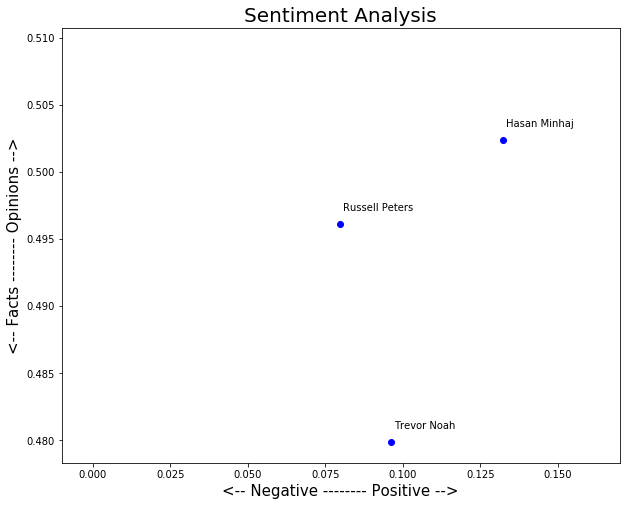

In [15]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(df.index):
    x = df.polarity.loc[comedian]
    y = df.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df['full_name'][index], fontsize=10)
    plt.xlim(-.01, .17) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [16]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [17]:
df

,transcript,full_name,polarity,subjectivity
hasan,Hasan Minhaj’s full comedy routine at the 2017...,Hasan Minhaj,0.132323,0.502385
russell,"-Yeah, Russell! Oi, Russell! Your mother is so...",Russell Peters,0.079878,0.496101
trevor,A NETFLIX ORIGINAL COMEDY SPECIAL [distant tra...,Trevor Noah,0.096365,0.479900


In [18]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in df.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Hasan Minhaj’s full comedy routine at the 2017 White House Correspondents’ Dinner. The comedian told one blistering joke after another about the sitting President of the United States, Donald Trump, and the media that covers him.\xa0 Okay, listen, I get it. I get it. We gotta address the elephant that’s not in the room. \nThe leader of our country is not here. And that’s because he lives in Moscow. \nIt is a very long flight. It’d be hard for Vlad to make it. \nVlad can’t just make it on a Saturday. It’s a Saturday. * * * Thank you, wow, oh my God. Ladies and gentlemen, welcome to the series finale of the White House correspondents’ dinner. Oh man. My name is Hasan Minhaj, or, as I will be known in a few weeks, Number 830287. Who would have thought, with everything going on in the country, that a Muslim would be standing on this stage — for the ninth year in a row, baby. We had eight years of Barack. What’s another year? I see you, fam. I see you, Barry. What you doing? You jet-skii

In [19]:
# The list has 3 elements, one for each transcript
len(list_pieces)

3

In [22]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [23]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript



[[0.03648046398046399,
  0.14742424242424237,
  0.24768920734437974,
  0.17589285714285716,
  -0.005632716049382702,
  0.1209173010897149,
  0.10745614035087717,
  0.13184862012987014,
  0.12105911330049263,
  0.20683261183261187],
 [0.15837718601480075,
  0.02930964052287581,
  -0.023352070814757386,
  0.1495247972926544,
  0.04310973541383988,
  0.11567528370596206,
  0.12399159663865543,
  0.05359353023909985,
  0.016834507300608995,
  0.10177211008536308],
 [0.22278402626414004,
  0.04534116676973819,
  0.12712081128747796,
  0.1844222359123356,
  0.00010635108037707172,
  0.07658868908868909,
  -0.028631360078277875,
  0.15337370084205523,
  0.10149608328179754,
  0.03568412923881674]]

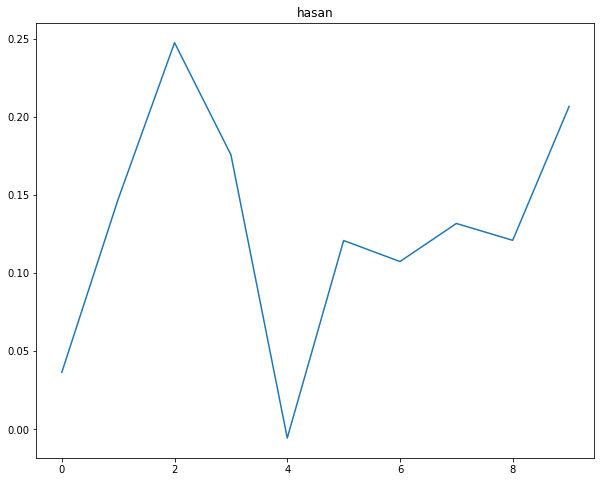

In [27]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(df['full_name'].index[0])
plt.show()

/home/vibertron/environments/venv/lib/python3.5/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/vibertron/environments/venv/lib/python3.5/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


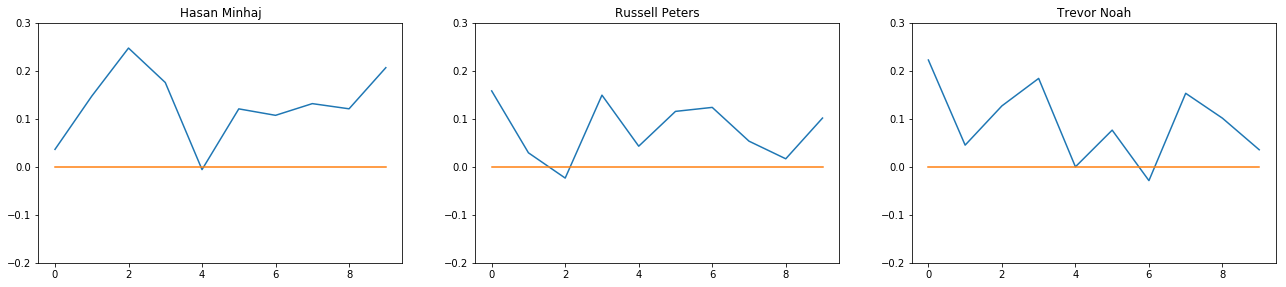

In [32]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [30, 15]

for index, comedian in enumerate(df.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(df['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

